# KERAS - pythonowa biblioteka do sieci neurnowych

Potem będzie kod, dostęp do notebooka przez:

<img style="width: 300px" src="frame.png" alt="QR"/>

## Keras - podstawa działania

* Open-source
* Współpracuje z:
    * Tensorflow (używana z założenia)
    * Theano
    * Microsoft Cognitive Toolkit
    * PlaidML
* Zaprojektowana dla szybkiego projektowanie i eksperymentowania z sieciami neurnowymi
* Główne cechy
    * Przyjazność dla użytkownika
    * Modularność
    * Rozszerzalność

## Czym tak trochę jest Keras?
<img style="width: 500px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Unico_Anello.png/1280px-Unico_Anello.png?1553285077510" alt="Ring"/>

# Keras - współdziałanie z innymi bibliotekami

Keras jest zbudowany tak, że jest trochę wrapperem nad wykorzystywanym frameworkiem do sieci neurnonowych

In [1]:
import keras
keras.backend.backend()

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'tensorflow'

# Keras - dostęp do znanych modeli

In [2]:
import keras.applications

In [3]:
import pkgutil
package = keras.applications
for importer, modname, ispkg in pkgutil.iter_modules(package.__path__):
    print(modname)

densenet
imagenet_utils
inception_resnet_v2
inception_v3
mobilenet
mobilenet_v2
mobilenetv2
nasnet
resnet50
vgg16
vgg19
xception


In [4]:
vgg16 = keras.applications.vgg16.VGG16()

Gdybym pobierać VGG16 pierwszy raz z użyciem jakiś konkretnych wag to na początku wagi by się pobrały, transparentnie dla użytkownika. Jedyny problem to fakt, że potrzebny jest dostęp do internetu i może to chwilę trwać, dla VGG w moim przypadku to było ponad 10 min.

Dodatkowo łatwy aspekt wizualizacji

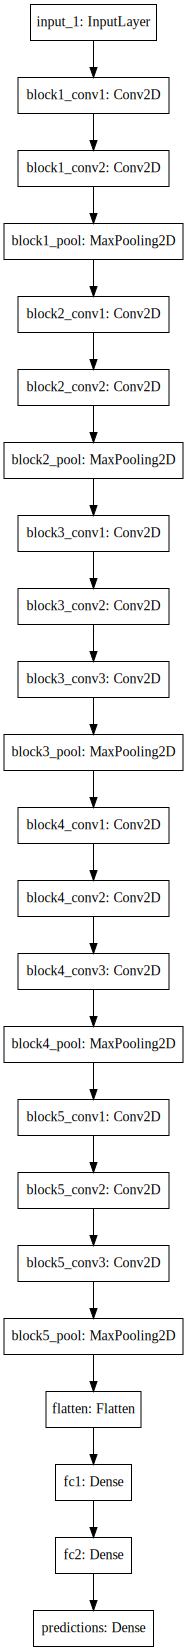

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(vgg16).create(prog='dot', format='svg'))

# Keras - dostęp do kilku znanych zbiorów danych

In [7]:
import pkgutil
import keras.datasets
package = keras.datasets
for importer, modname, ispkg in pkgutil.iter_modules(package.__path__):
    print(modname)

boston_housing
cifar
cifar10
cifar100
fashion_mnist
imdb
mnist
reuters


# Keras - dostęp do wszystkich znanych warstw sieci neurnownych

In [8]:
import pkgutil
import keras.layers
package = keras.layers
for importer, modname, ispkg in pkgutil.iter_modules(package.__path__):
    print(modname)

advanced_activations
convolutional
convolutional_recurrent
core
cudnn_recurrent
embeddings
local
merge
noise
normalization
pooling
recurrent
wrappers


# Keras - augmentacja danych 

In [8]:
import os
import scipy as sp
import scipy.io
from skimage import transform
import numpy as np
import random
background_photos = [f'.{os.path.sep}data{os.path.sep}backgrounds{os.path.sep}{photo}' for photo in os.listdir(f'.{os.path.sep}data{os.path.sep}backgrounds{os.path.sep}')]
mat = sp.io.loadmat(f'data{os.path.sep}jsl_rendn.mat')
data = np.array([transform.resize(x, (128, 128)) for x in np.swapaxes(mat['jsl_rendn'], 1, 3)])

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [34]:
from matplotlib.image import imread
from matplotlib.pyplot import imshow

def insert_background(image):
    background = transform.resize(imread(random.choice(background_photos))/255., (128, 128))
    return (image <= np.full(image.shape, 0.05)).astype('float')*background + image


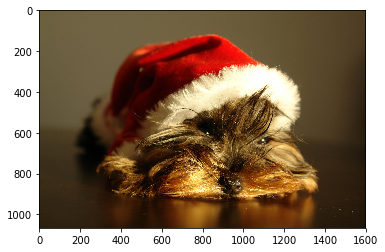

In [58]:
imshow(imread(background_photos[0]))

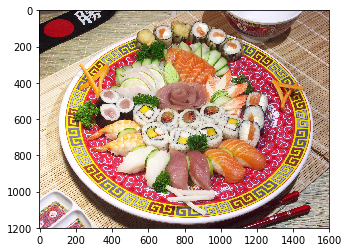

In [59]:
imshow(imread(background_photos[1]))

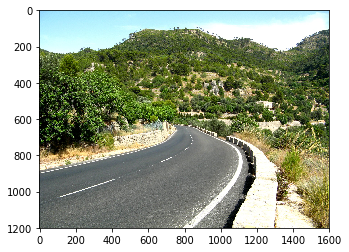

In [61]:
imshow(imread(background_photos[2]))

In [71]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=insert_background
)

In [47]:
mat2 = sp.io.loadmat(f'.{os.path.sep}data{os.path.sep}jsl_rendn_label.mat')
labels = mat2['jsl_rendn_label']
gen = datagen.flow(data, batch_size=1)

In [ ]:
imshow(gen.next()[0])

# Keras - callbacki



In [32]:
class Callback(object):

    def __init__(self):
        self.validation_data = None
        self.model = None

    def set_params(self, params):
        self.params = params

    def set_model(self, model):
        self.model = model

    def on_batch_begin(self, batch, logs=None):
        pass

    def on_batch_end(self, batch, logs=None):
        pass

    def on_epoch_begin(self, epoch, logs=None):
        pass

    def on_epoch_end(self, epoch, logs=None):
        pass

    def on_train_batch_begin(self, batch, logs=None):
        pass

    def on_train_batch_end(self, batch, logs=None):
        pass

    def on_test_batch_begin(self, batch, logs=None):
        pass
    
    def on_test_batch_end(self, batch, logs=None):
        pass

    def on_predict_batch_begin(self, batch, logs=None):
        pass

    def on_predict_batch_end(self, batch, logs=None):
        pass

    def on_train_begin(self, logs=None):
        pass

    def on_train_end(self, logs=None):
        pass

    def on_test_begin(self, logs=None):
        pass

    def on_test_end(self, logs=None):
        pass

    def on_predict_begin(self, logs=None):
        pass

    def on_predict_end(self, logs=None):
        pass

Keras dostarcza dużo callbacków z założenia:
* BaseLogger
* LambdaCallback
* EarlyStopping
* itd

# Keras - przykład

In [27]:
from __future__ import print_function
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

h = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 38s 633us/step - loss: 0.2757 - acc: 0.9141 - val_loss: 0.0597 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 37s 617us/step - loss: 0.0890 - acc: 0.9734 - val_loss: 0.0392 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 37s 616us/step - loss: 0.0661 - acc: 0.9803 - val_loss: 0.0328 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 37s 615us/step - loss: 0.0539 - acc: 0.9837 - val_loss: 0.0319 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 37s 614us/step - loss: 0.0482 - acc: 0.9853 - val_loss: 0.0290 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 37s 616us/step - loss: 0.0412 - acc: 0.9877 - val_loss: 0.0265 - val_acc: 0.9916
Epoch 7/12
60000/60000 [===================

## po uczeniu zwracane zostają statystyki uczenia

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


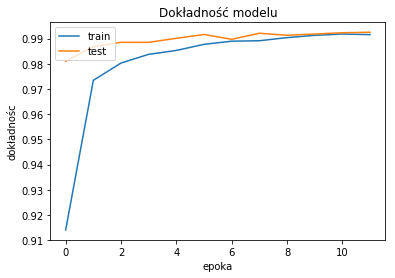

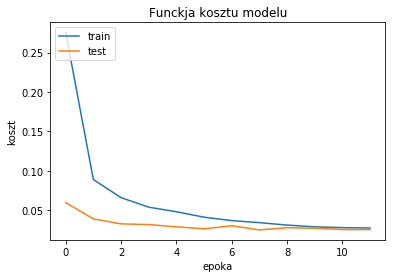

In [30]:
import matplotlib.pyplot as plt
import numpy

history = h
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Dokładność modelu')
plt.ylabel('dokładnośc')
plt.xlabel('epoka')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funckja kosztu modelu')
plt.ylabel('koszt')
plt.xlabel('epoka')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Keras - eksport modelu


In [24]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Zapisano")

Zapisano


# Keras - odczyt modelu


In [26]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Wczytano")

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Wczytano
Test loss: 0.0046553951257888
Test accuracy: 0.9985099971771241
